##DEFINE INTERSECTION CLASS

In [1]:
class Intersection:
  def __init__(self, idCalle, nombreCalle, id_calle_origen, id_calle_final, id_origen_interseccion, id_destino_interseccion, Distancia, velocidad, costo1, costo2, latitud_origen, longitud_origen, latitud_destino, longitud_destino):
    self.idCalle=idCalle
    self.nombreCalle=nombreCalle
    self.id_calle_origen=id_calle_origen
    self.id_calle_final=id_calle_final
    self.id_origen_interseccion=id_origen_interseccion
    self.id_destino_interseccion=id_destino_interseccion
    self.Distancia=Distancia
    self.velocidad=velocidad
    self.costo1=costo1
    self.costo2=costo2
    self.latitud_origen=latitud_origen
    self.longitud_origen=longitud_origen
    self.latitud_destino=latitud_destino
    self.longitud_destino=longitud_destino
  
  def getidBeginInter(self):
    return self.id_origen_interseccion

  def getidEndInter(self):
    return self.id_destino_interseccion

  def getDistance(self):
    return self.Distancia

    

##INTERACTIVE MAP USING FOLIUM

In [2]:
import folium
from folium.plugins import MiniMap

Plaza_2_de_Mayo=folium.Map(location=[-12.0459308, -77.0427831], zoom_start=100)
popuptext="<b>Plaza 2 de Mayo</b>"

folium.TileLayer("stamenterrain").add_to(Plaza_2_de_Mayo)

minimap=MiniMap(tile_layer="stamenterrain")

Plaza_2_de_Mayo.add_child(minimap)

##READ DATASET
##CREATE LIST ADJACENCY
##CREATE GRAPH
##DRAW GRAPH USING NETWORKX

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

list_intersections=[]

#READ INTERSECTIONS
with open("Lima-intersecciones.csv", "r", encoding="utf8") as csv_file:
  csv_reader=csv.reader(csv_file, delimiter=";")
  cont=0
  for line in csv_reader:
    if cont>10:
      break;
    else:
      intersection=Intersection(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10],line[11],line[12],line[13],line[14])
      folium.Marker(location=[float(line[13]), float(line[14])]).add_to(Plaza_2_de_Mayo)
      folium.Marker(location=[float(line[11]), float(line[12])]).add_to(Plaza_2_de_Mayo)
      list_intersections.append(intersection)
      cont+=1

#CREATE A LIST ADJACENCY
listAdjacency=[]
listWeights=[]
for i in list_intersections:
  list=[]
  list.append(i.getidBeginInter())
  list.append(i.getidEndInter())
  listWeights.append(i.getDistance())
  listAdjacency.append(list)

print(listAdjacency)
##print(len(listAdjacency))

##CREATE A GRAPH
G=nx.Graph()
G.add_edges_from(listAdjacency)

pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_labels(G,pos)


##CONVERT DATASET TO DATAFRAME AND READ IT

In [4]:
import pandas as pd
import numpy as np
import networkx as nx

In [5]:
df=pd.read_csv('Lima-intersecciones_v2.csv', sep=",",encoding = "ISO-8859-1", nrows=11)

In [6]:
df.head(13)

,Item,ID_Calle,Nombre_Calle,ID_Calle_Origen,ID_Calle_Final,ID_Origen_intereccion,ID_Final_Interseccion,distancia_Km,velocidad,Costo1,Costo2,Latitud_Origen_Interseccion,Longitud_Origen_Interseccion,Latitud_Destino_Interseccion,Longitud_Destino_Interseccion
0,1,4827820,Plaza 2 de Mayo,31035122,31035142,1,6,0.038973,70,0.000557,1000000,-12.045931,-77.042783,-12.046096,-77.043090
1,2,4827820,Plaza 2 de Mayo,31035142,31035109,6,90275,0.004040,70,0.000058,1000000,-12.046096,-77.043090,-12.046125,-77.043111
2,3,4827820,Plaza 2 de Mayo,31035109,31035110,90275,79,0.018227,70,0.000260,1000000,-12.046125,-77.043111,-12.046277,-77.043175
3,4,4827820,Plaza 2 de Mayo,31035110,31035112,79,51668,0.037674,70,0.000538,1000000,-12.046277,-77.043175,-12.046603,-77.043112
4,5,4827820,Plaza 2 de Mayo,31035112,31035113,51668,7,0.010827,70,0.000155,1000000,-12.046603,-77.043112,-12.046678,-77.043048
5,6,4827820,Plaza 2 de Mayo,31035113,31035116,7,10,0.072327,70,0.001033,1000000,-12.046678,-77.043048,-12.046695,-77.042435
6,7,4827820,Plaza 2 de Mayo,31035116,31035117,10,89757,0.022975,70,0.000328,1000000,-12.046695,-77.042435,-12.046520,-77.042322
7,8,4827820,Plaza 2 de Mayo,31035117,310954401,89757,3473,0.007704,70,0.000110,1000000,-12.046520,-77.042322,-12.046454,-77.042302
8,9,4827820,Plaza 2 de Mayo,310954401,31035119,3473,3472,0.028386,70,0.000405,1000000,-12.046454,-77.042302,-12.046202,-77.042325
9,10,4827820,Plaza 2 de Mayo,31035119,31035121,3472,2,0.041075,70,0.000587,1000000,-12.046202,-77.042325,-12.045953,-77.042592


##CREATE GRAPH USING DATAFRAME

In [7]:
INTER = nx.from_pandas_edgelist(df,source='ID_Origen_intereccion',target='ID_Final_Interseccion',edge_attr=['distancia_Km','ID_Final_Interseccion', 'ID_Origen_intereccion','Nombre_Calle','Costo2', 'Latitud_Origen_Interseccion','Longitud_Origen_Interseccion','Latitud_Destino_Interseccion','Longitud_Destino_Interseccion'])

In [8]:
INTER.nodes()

NodeView((1, 6, 90275, 79, 51668, 7, 10, 89757, 3473, 3472, 2))

In [9]:
INTER.order()

11

In [10]:
INTER.edges()

EdgeView([(1, 6), (1, 2), (6, 90275), (90275, 79), (79, 51668), (51668, 7), (7, 10), (10, 89757), (89757, 3473), (3473, 3472), (3472, 2)])

##SHOW GRAPH

{1: Text(0.8174993354089435, 0.6323892470409906, '1'),
 2: Text(1.0, 0.10491608212135671, '2'),
 6: Text(0.36202005168667467, 0.9493036550332796, '6'),
 7: Text(-0.9483202994588454, -0.38243519459094394, '7'),
 10: Text(-0.6153345884527421, -0.8279239311026018, '10'),
 79: Text(-0.688533773710051, 0.6695862509516481, '79'),
 3472: Text(0.8624359654695798, -0.44192331241321037, '3472'),
 3473: Text(0.46126013381497327, -0.8450109822359095, '3473'),
 51668: Text(-0.9682268414112652, 0.17746231334215595, '51668'),
 89757: Text(-0.08419404562924508, -0.9951522628650369, '89757'),
 90275: Text(-0.19860593771802276, 0.958788134718272, '90275')}

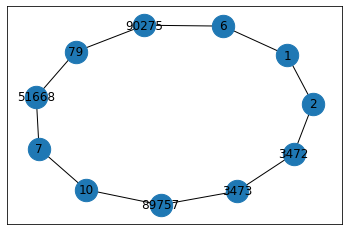

In [11]:
pos=nx.spring_layout(INTER)

nx.draw_networkx_nodes(INTER, pos, node_size=500)
nx.draw_networkx_edges(INTER, pos, edgelist=INTER.edges(), edge_color='black')
nx.draw_networkx_labels(INTER,pos)
##DRAW EDGE LABELS
#labels = nx.get_edge_attributes(INTER,'distancia_Km')
#nx.draw_networkx_edge_labels(INTER,pos,edge_labels=labels)

##FIND THE SHORTEST PATH USING DIJKSTRA(is not **IMPLEMENTED**, is a networkx' library)

In [12]:
djk_path=nx.dijkstra_path(INTER, source=6, target=10, weight='distancia_Km')##NODE "6" TO NODE "10"
djk_path##PRINT THE ARRAY

[6, 90275, 79, 51668, 7, 10]

##DRAW THE PATH

{6: Text(-0.9589901593544012, 1.0, '6'),
 7: Text(0.6228861311479188, -0.62973106612916, '7'),
 10: Text(0.9954812512992257, -0.9636760889028269, '10'),
 79: Text(-0.22984326766794658, 0.19838879327292216, '79'),
 51668: Text(0.19746288984136406, -0.23067581263970657, '51668'),
 90275: Text(-0.6269968452661611, 0.6256941743987707, '90275')}

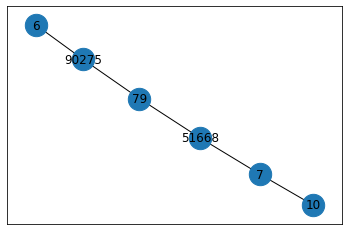

In [13]:
path=INTER.subgraph(djk_path)##Generate a subgraph, to draw

pos=nx.spring_layout(path)

nx.draw_networkx_nodes(path, pos, node_size=500)
nx.draw_networkx_edges(path, pos, edgelist=path.edges(), edge_color='black')
nx.draw_networkx_labels(path,pos)

##IMPLEMENTATION OF THE TRAFIC FACTOR 

{(1, 2): Text(0.6097465754709657, 0.7706562268682391, '0.0209908'),
 (1, 6): Text(0.1072880086485184, 0.931584746593066, '0.0389729'),
 (6, 90275): Text(-0.41673837457514507, 0.7971824928326632, '0.0040401'),
 (7, 10): Text(-0.37386396835178715, -0.8877916934748337, '0.0723266'),
 (10, 89757): Text(0.1603636767212991, -0.8967909535360128, '0.0229747'),
 (79, 51668): Text(-0.9569746468420897, -0.09368795982685857, '0.0376738'),
 (3472, 2): Text(0.9164983193842198, 0.3533344194981828, '0.0410751'),
 (3473, 3472): Text(0.9218839337402638, -0.17385740387669849, '0.0283858'),
 (51668, 7): Text(-0.7966601759026397, -0.5874254005868178, '0.0108272'),
 (89757, 3473): Text(0.6378304142980561, -0.6326581235946721, '0.0077038'),
 (90275, 79): Text(-0.8093737625916616, 0.41945364910374205, '0.0182271')}

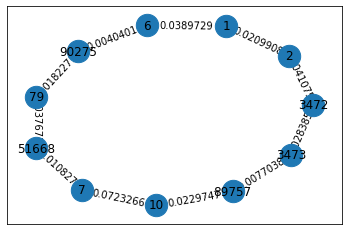

In [14]:
pos=nx.spring_layout(INTER)

nx.draw_networkx_nodes(INTER, pos, node_size=500)
nx.draw_networkx_edges(INTER, pos, edgelist=INTER.edges(), edge_color='black')
nx.draw_networkx_labels(INTER,pos)
##DRAW EDGE LABELS
labels = nx.get_edge_attributes(INTER,'distancia_Km')
nx.draw_networkx_edge_labels(INTER,pos,edge_labels=labels)

In [15]:
##Obtenemos la hora exacta de nuetra region
from datetime import datetime
from pytz import timezone
import pytz
import random

def get_time_hour():
  location=pytz.timezone('America/Bogota')
  date=datetime.now(location).hour

  return date

##print(date)

##La idea es hacer condicionales, dependiendo del tiempo(se utilizara una biblioteca q nos de la hora actual) para actualizar el valor del peso (q es la distancia) en los "egdes".

def get_traffic_factor(date):
  trafic_factor=1
  ##NO QUEDA CLARO Q TAN COMPLEJO DEBE SER
  ##POR MIENTRAS ESTARA ASI
  if((date>7 and date<9)or(date>18 and date>21)):##Intervalos de tiempo en donde hay mayor concurrecia vehicular
    trafic_factor=2
  
  return trafic_factor

#for e in INTER.edges():##imprimir primera version
#  print(INTER[e[0]][e[1]]['distancia_Km'])

def get_costo(distancia, factor):
  costo= distancia*1000*factor
  return costo

def update_weigths_egde():
  ##recorremos el grafo
  for e in INTER.edges():
    ##print( INTER.get_edge_data(e[0], e[1]))
      r=random.randint(1,100)
      ##COMO TENEMOS UN DATASET GRANDE LA ACTUALIZACION DE TRAFICO SERA A CALLES RANDOM
      if(r%2==0):##como solo va ser el trafico en algunas calles, y contamos con un dataset grande, vamos a hacerlo random(solo a los multiplos de 5 o utilizamos random)
        INTER[e[0]][e[1]]['Costo2'] = get_costo(INTER[e[0]][e[1]]['distancia_Km'], (get_traffic_factor(get_time_hour())))
      


In [16]:
#for e in INTER.nodes():##Probando el cambio de peso
#  print(INTER.nodes[e])
##for e in INTER.nodes():##Probando el cambio de peso
 ## print(INTER[e]['Costo2'])
for e in INTER.nodes():
  print(INTER.edges(e))
  

[(1, 6), (1, 2)]
[(6, 1), (6, 90275)]
[(90275, 6), (90275, 79)]
[(79, 90275), (79, 51668)]
[(51668, 79), (51668, 7)]
[(7, 51668), (7, 10)]
[(10, 7), (10, 89757)]
[(89757, 10), (89757, 3473)]
[(3473, 89757), (3473, 3472)]
[(3472, 3473), (3472, 2)]
[(2, 3472), (2, 1)]


{(1, 2): Text(-0.29309480876403493, 0.8083985378946206, '0.0209908'),
 (1, 6): Text(0.23493939316423157, 0.8227335107587446, '0.0389729'),
 (6, 90275): Text(0.6956196904400078, 0.5874515260917794, '0.0040401'),
 (7, 10): Text(0.030782418371606335, -0.8475261806356602, '0.0723266'),
 (10, 89757): Text(-0.48194480800905737, -0.7338774068517127, '0.0229747'),
 (79, 51668): Text(0.8831899680922699, -0.3376806891972012, '0.0376738'),
 (3472, 2): Text(-0.7379744619330904, 0.546524527272753, '0.0410751'),
 (3473, 3472): Text(-0.9551288197474752, 0.09669636444048495, '0.0283858'),
 (51668, 7): Text(0.5345487460805591, -0.707341941592635, '0.0108272'),
 (89757, 3473): Text(-0.8563563502247321, -0.388147938590916, '0.0077038'),
 (90275, 79): Text(0.945419032529714, 0.15276969040974292, '0.0182271')}

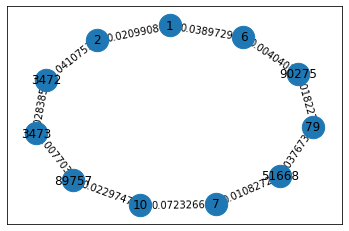

In [17]:
pos=nx.spring_layout(INTER)

nx.draw_networkx_nodes(INTER, pos, node_size=500)
nx.draw_networkx_edges(INTER, pos, edgelist=INTER.edges(), edge_color='black')
nx.draw_networkx_labels(INTER,pos)
##DRAW EDGE LABELS
labels = nx.get_edge_attributes(INTER,'distancia_Km')
nx.draw_networkx_edge_labels(INTER,pos,edge_labels=labels)

In [18]:
import folium
from folium.plugins import MiniMap
import pandas as pf
import webbrowser

##webbrowser.open('')

LIMA=folium.Map(location=[-12.0459308, -77.0427831], zoom_start=100)

folium.TileLayer("stamenterrain").add_to(LIMA)

minimap=MiniMap(tile_layer="stamenterrain")

LIMA.add_child(minimap)



##Creamos los marcadores para cada interseccion
for e in INTER.edges():##Probando el cambio de peso
  popuptext=str(INTER[e[0]][e[1]]['ID_Origen_intereccion']) 
  ##folium.Marker(location=[float(line[13]), float(line[14])]).add_to(Plaza_2_de_Mayo)
  folium.Marker(location=[float(INTER[e[0]][e[1]]['Latitud_Origen_Interseccion']) , float(INTER[e[0]][e[1]]['Longitud_Origen_Interseccion'])],popup=popuptext).add_to(LIMA)##ORIGEN
  ##folium.Marker(location=[INTER[e[0]][e[1]]['Latitud_Destino_Interseccion'], INTER[e[0]][e[1]]['Longitud_Destino_Interseccion']],popup=popuptext).add_to(LIMA)##DESTINO
  print(INTER[e[0]][e[1]]['Latitud_Origen_Interseccion'],INTER[e[0]][e[1]]['Longitud_Origen_Interseccion'])
  #print(INTER[e[0]][e[1]]['Latitud_Destino_Interseccion'],INTER[e[0]][e[1]]['Longitud_Destino_Interseccion'])
  print("\n")

##folium.Marker(location=[float(), float()]).add_to(LIMA)
  ##    folium.Marker(location=[float(), float()]).add_to(LIMA)

##pos=[]

#for i in range(0, len(INTER)):

##LIMA.save('mimapa.html')
##webbrowser.open('mimapa.html')

-12.0459308 -77.0427831


-12.0459528 -77.0425923


-12.0460958 -77.0430896


-12.0461253 -77.0431113


-12.0462768 -77.0431753


-12.0466033 -77.0431118


-12.0466783 -77.0430483


-12.0466949 -77.042435


-12.0465202 -77.0423222


-12.0464537 -77.0423023


-12.0462019 -77.0423251




In [19]:
LIMA

##MARCAR CAMINO

In [20]:
##Agregar atributos al nodo
#nx.set_node_attributes(G, pd.Series(nodes.gender, index=nodes.node).to_dict(), 'distancia_Km')

##POR MIENTRAS USAREMOS EL ALGORITMO Q NOS PROVEE LA BIBLIOTECA; PORTERIORMENTO LO IMPLEMENTAREMOS
djk_path=nx.dijkstra_path(INTER, source=6, target=10, weight='distancia_Km')##NODE "6" TO NODE "10"
djk_path##PRINT THE ARRAY
##DIBUJAREMOS LINEAS EN EL MAPA USANDO FOLIUM
#cont=0
place_lat=[]
place_lng=[]
for p in djk_path:##Probando el cambio de peso
  for n in INTER.nodes():
    if(n==p):
      for e in INTER.edges():
        if(e[0]==n):
          ##if(cont==0):
            ##location1=float(INTER[e[0]][e[1]]['Latitud_Origen_Interseccion']),float(INTER[e[0]][e[1]]['Longitud_Origen_Interseccion'])
          ##else:
            ##location2=float(INTER[e[0]][e[1]]['Latitud_Origen_Interseccion']),float(INTER[e[0]][e[1]]['Longitud_Origen_Interseccion'])
            ##folium.PolyLine(location1, location2).add_to(LIMA)
            ##location1=location2
          ##print(location1, location2)
          
          print(e[1],p, INTER[e[0]][e[1]]['Latitud_Origen_Interseccion'],INTER[e[0]][e[1]]['Longitud_Origen_Interseccion'])
          place_lat.append(float(INTER[e[0]][e[1]]['Latitud_Origen_Interseccion']))
          place_lng.append(float(INTER[e[0]][e[1]]['Longitud_Origen_Interseccion']))
          ##cont=cont+1
          break
      ##folium.PolyLine(INTER)
print(place_lat)
print(place_lng)

points=[]

for i in range(len(place_lat)):
    points.append([place_lat[i], place_lng[i]])


for index,lat in enumerate(place_lat):
    
  folium.PolyLine(points, color='red').add_to(LIMA)

90275 6 -12.0460958 -77.0430896
79 90275 -12.0461253 -77.0431113
51668 79 -12.0462768 -77.0431753
7 51668 -12.0466033 -77.0431118
10 7 -12.0466783 -77.0430483
89757 10 -12.0466949 -77.042435
[-12.0460958, -12.0461253, -12.0462768, -12.0466033, -12.0466783, -12.0466949]
[-77.0430896, -77.0431113, -77.0431753, -77.0431118, -77.0430483, -77.042435]


In [21]:
##for e in INTER.nodes():##Probando el cambio de peso
#  print(INTER.nodes[e])
for e in INTER.edges():##Probando el cambio de peso
  print(e[1])

6
2
90275
79
51668
7
10
89757
3473
3472
2


In [ ]:
# Cargamos las librerías necesarias
from IPython.html import widgets
from IPython.display import display

def print_linea_origen(Estacion_origen):
    return Estacion_origen
    
def select_estacion_origen(Linea_origen):
    ESTACIONES_ORIGEN.options = ESTACIONES_LINEA[Linea_origen]
    
def print_linea_destino(Estacion_destino):
    return Estacion_destino
    
def select_estacion_destino(Linea_destino):
    ESTACIONES_DESTINO.options = ESTACIONES_LINEA[Linea_destino]
# Lanzamos los widgets
LINEAS_ORIGEN     = widgets.Select(options = ESTACIONES_LINEA.keys())
ESTACIONES_ORIGEN = widgets.Select(options = ESTACIONES_LINEA[LINEAS_ORIGEN.value])

LINEAS_DESTINO     = widgets.Select(options = ESTACIONES_LINEA.keys())
ESTACIONES_DESTINO = widgets.Select(options = ESTACIONES_LINEA[LINEAS_DESTINO.value])

linea_origen  = widgets.interactive(select_estacion_origen, Linea_origen = LINEAS_ORIGEN)
origen        = widgets.interactive(print_linea_origen, Estacion_origen = ESTACIONES_ORIGEN)

linea_destino = widgets.interactive(select_estacion_destino, Linea_destino = LINEAS_DESTINO)
destino       = widgets.interactive(print_linea_destino, Estacion_destino = ESTACIONES_DESTINO)

display(linea_origen)
display(origen)

display(linea_destino)
display(destino)

In [23]:
LIMA

##IMPLEMENTACION DE DIJKSTRA

In [ ]:

import heapq as hq
import numpy as np
import graphviz as gv
import math
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [ ]:
##path, cost = dijkstra(INTER.edges(), 6)
##print(path)
##print(cost)

In [ ]:
for x in INTER.edges():
  print(x)

(1, 6)
(1, 2)
(6, 90275)
(90275, 79)
(79, 51668)
(51668, 7)
(7, 10)
(7, 20398)
(10, 89757)
(10, 20131)
(89757, 3473)
(3473, 3472)
(3472, 2)
(3, 4)
(20398, 89758)
(89758, 25784)
(25784, 25783)
(25783, 3456)
(3456, 10285)
(10285, 20279)
(20279, 2996)
(2996, 61002)
(61002, 51747)
(51747, 93140)
(93140, 90309)
(90309, 10593)
(10593, 20265)
(20265, 8)
(8, 93168)
(8, 3765)
(9, 90834)
(9, 20253)
(9, 17)
(90834, 90833)
(90833, 51748)
(51748, 10284)
(10284, 20140)
(20140, 20106)
(20106, 10287)
(10287, 20101)
(20101, 20107)
(20107, 20136)
(20136, 20131)
(11, 65165)
(65165, 26831)
(26831, 37013)
(37013, 12)
(12, 16)
(12, 22)
(13, 15)
(13, 20)
(17, 93168)
(3765, 12773)
(12773, 3451)
(3451, 91660)
(91660, 91696)
(91696, 3725)
(3725, 3726)
(3726, 3729)
(3729, 231)
(231, 230)
(230, 20253)
(22, 18)
(22, 39036)
(18, 21)
(19, 20)
(21, 94626)
(39036, 24)
(24, 33935)
(24, 25)
(33935, 20381)
(20381, 20480)
(20480, 20423)
(20423, 20540)
(20540, 90804)
(90804, 20429)
(20429, 31230)
(31230, 40035)
(40035, 209